# Download Dataset

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 67 Nov 17 08:45 kaggle.json


In [3]:
!cat ~/.kaggle/kaggle.json
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 4.2 MB 32.0 MB/s 
     |████████████████████████████████| 147 kB 68.9 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 112 kB 81.6 MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6uhqj3rv/lxml_244f7ab694db47f4b15950050a9f7c1e/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6uhqj3rv/lxml_244f7ab694db47f4b15950050a9f7c1e/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-fjsbpjx1/install-record.txt --s

In [4]:
!kaggle competitions download -c ventilator-pressure-prediction

 94% 209M/223M [00:01<00:00, 131MB/s]
100% 223M/223M [00:01<00:00, 154MB/s]


In [5]:
!unzip ventilator-pressure-prediction.zip

Archive:  ventilator-pressure-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Import Packages

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random

# Read Dataset

In [7]:
dataset = os.path.join("")

In [8]:
train_dataset = pd.read_csv(os.path.join(dataset, "train.csv"))
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [9]:
np.unique(train_dataset['R'])

array([ 5, 20, 50])

In [10]:
test_dataset = pd.read_csv(os.path.join(dataset, "test.csv"))
test_dataset.head(n=400)

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
395,396,31,20,50,2.552009,4.977700,1
396,397,31,20,50,2.586213,4.981205,1
397,398,31,20,50,2.620192,4.984142,1
398,399,31,20,50,2.654192,4.986621,1


In [11]:
np.unique(train_dataset['breath_id'], return_counts = True)

(array([     1,      2,      3, ..., 125743, 125745, 125749]),
 array([80, 80, 80, ..., 80, 80, 80]))

In [12]:
final_dataset = train_dataset.groupby('breath_id')
final_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


In [13]:
data = train_dataset.groupby(["breath_id"])
data.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


# Features Engineering

In [14]:
train_dataset['un_in_std'] = data['u_in'].transform(lambda x: (x - x.mean()) / x.std())
train_dataset['time_step_std'] = data['time_step'].transform(lambda x: (x - x.mean()) / x.std())

In [15]:
train_dataset['time_step_after'] = data[['time_step_std']].shift()
train_dataset['u_in_after'] = data[['un_in_std']].shift()
train_dataset['u_out_after'] = data[['u_out']].shift()
train_dataset['time_step_back'] = data[['time_step_std']].shift(-1)
train_dataset['u_in_back'] = data[['un_in_std']].shift(-1)
train_dataset['u_out_back'] = data[['u_out']].shift(-1)
train_dataset['time_step_after2'] = data[['time_step_std']].shift(2)
train_dataset['u_in_after2'] = data[['un_in_std']].shift(2)
train_dataset['u_out_after2'] = data[['u_out']].shift(2)
train_dataset['time_step_back2'] = data[['time_step_std']].shift(-2)
train_dataset['u_in_back2'] = data[['un_in_std']].shift(-2)
train_dataset['u_out_back2'] = data[['u_out']].shift(-2)
train_dataset['time_step_after3'] = data[['time_step_std']].shift(3)
train_dataset['u_in_after3'] = data[['un_in_std']].shift(3)
train_dataset['u_out_after3'] = data[['u_out']].shift(3)
train_dataset['time_step_back3'] = data[['time_step_std']].shift(-3)
train_dataset['u_in_back3'] = data[['un_in_std']].shift(-3)
train_dataset['u_out_back3'] = data[['u_out']].shift(-3)
train_dataset['time_step_after4'] = data[['time_step_std']].shift(4)
train_dataset['u_in_after4'] = data[['un_in_std']].shift(4)
train_dataset['u_out_after4'] = data[['u_out']].shift(4)
train_dataset['time_step_back4'] = data[['time_step_std']].shift(-4)
train_dataset['u_in_back4'] = data[['un_in_std']].shift(-4)
train_dataset['u_out_back4'] = data[['u_out']].shift(-4)
train_dataset['time_step_after5'] = data[['time_step_std']].shift(5)
train_dataset['u_in_after5'] = data[['un_in_std']].shift(5)
train_dataset['u_out_after5'] = data[['u_out']].shift(5)
train_dataset['time_step_back5'] = data[['time_step_std']].shift(-5)
train_dataset['u_in_back5'] = data[['un_in_std']].shift(-5)
train_dataset['u_out_back5'] = data[['u_out']].shift(-5)

In [17]:
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,un_in_std,time_step_std,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,1,1,20,50,0.000000,0.083334,0,5.837492,-0.993975,-1.699182,...,NaN,-1.527627,1.502404,0.0,NaN,NaN,NaN,-1.484734,1.690480,0.0
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.813641,-1.656655,...,NaN,-1.484734,1.690480,0.0,NaN,NaN,NaN,-1.441756,1.677403,0.0
2,3,1,20,50,0.067514,22.509278,0,7.876254,1.221224,-1.613864,...,NaN,-1.441756,1.677403,0.0,NaN,NaN,NaN,-1.398771,1.645819,0.0
3,4,1,20,50,0.101542,22.808822,0,11.742872,1.250813,-1.570863,...,NaN,-1.398771,1.645819,0.0,NaN,NaN,NaN,-1.355737,1.750226,0.0
4,5,1,20,50,0.135756,25.355850,0,12.234987,1.502404,-1.527627,...,0.0,-1.355737,1.750226,0.0,NaN,NaN,NaN,-1.312828,1.794510,0.0


In [18]:
train_dataset.fillna(0, inplace = True)

In [19]:
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,un_in_std,time_step_std,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,1,1,20,50,0.000000,0.083334,0,5.837492,-0.993975,-1.699182,...,0.0,-1.527627,1.502404,0.0,0.0,0.0,0.0,-1.484734,1.690480,0.0
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.813641,-1.656655,...,0.0,-1.484734,1.690480,0.0,0.0,0.0,0.0,-1.441756,1.677403,0.0
2,3,1,20,50,0.067514,22.509278,0,7.876254,1.221224,-1.613864,...,0.0,-1.441756,1.677403,0.0,0.0,0.0,0.0,-1.398771,1.645819,0.0
3,4,1,20,50,0.101542,22.808822,0,11.742872,1.250813,-1.570863,...,0.0,-1.398771,1.645819,0.0,0.0,0.0,0.0,-1.355737,1.750226,0.0
4,5,1,20,50,0.135756,25.355850,0,12.234987,1.502404,-1.527627,...,0.0,-1.355737,1.750226,0.0,0.0,0.0,0.0,-1.312828,1.794510,0.0


In [20]:
features = train_dataset.drop(['pressure', 'id', 'breath_id', 'u_in', 'time_step'], axis = 1)
target = train_dataset['pressure']

In [21]:
features.head()

,R,C,u_out,un_in_std,time_step_std,time_step_after,u_in_after,u_out_after,time_step_back,u_in_back,...,u_out_after4,time_step_back4,u_in_back4,u_out_back4,time_step_after5,u_in_after5,u_out_after5,time_step_back5,u_in_back5,u_out_back5
0,20,50,0,-0.993975,-1.699182,0.000000,0.000000,0.0,-1.656655,0.813641,...,0.0,-1.527627,1.502404,0.0,0.0,0.0,0.0,-1.484734,1.690480,0.0
1,20,50,0,0.813641,-1.656655,-1.699182,-0.993975,0.0,-1.613864,1.221224,...,0.0,-1.484734,1.690480,0.0,0.0,0.0,0.0,-1.441756,1.677403,0.0
2,20,50,0,1.221224,-1.613864,-1.656655,0.813641,0.0,-1.570863,1.250813,...,0.0,-1.441756,1.677403,0.0,0.0,0.0,0.0,-1.398771,1.645819,0.0
3,20,50,0,1.250813,-1.570863,-1.613864,1.221224,0.0,-1.527627,1.502404,...,0.0,-1.398771,1.645819,0.0,0.0,0.0,0.0,-1.355737,1.750226,0.0
4,20,50,0,1.502404,-1.527627,-1.570863,1.250813,0.0,-1.484734,1.690480,...,0.0,-1.355737,1.750226,0.0,0.0,0.0,0.0,-1.312828,1.794510,0.0


In [22]:
features = np.array(features)
features.shape

(6036000, 35)

In [23]:
features = features.reshape(int(features.shape[0]/80), 80, features.shape[1])
features.shape

(75450, 80, 35)

In [24]:
target = np.array(target)
target.shape

(6036000,)

In [25]:
target = target.reshape(75450, 80)
target.shape

(75450, 80)

# Deep Learning Model

In [26]:
norm = tf.keras.layers.Normalization(input_shape = [80, features.shape[2],], axis = -1)
norm.adapt(features)

In [27]:
m = tf.keras.Sequential([
    norm,
    tf.keras.layers.Conv1D(128, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(80,)
])
m.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "mae")

In [28]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80, 35)           71        
 n)                                                              
                                                                 
 conv1d (Conv1D)             (None, 78, 128)           13568     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 39, 128)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 256)           98560     
                                                        

# Training Model

In [29]:
history = m.fit(features, target, validation_split = 0.2, epochs = 3500, batch_size = 512,
                callbacks = [tf.keras.callbacks.EarlyStopping(patience = 260, 
                                                              monitor = 'val_loss', 
                                                              mode = 'min', 
                                                              restore_best_weights=True)])

Epoch 1/3500
118/118 [==============================] - 20s 57ms/step - loss: 4.5499 - val_loss: 2.3990
Epoch 2/3500
118/118 [==============================] - 4s 37ms/step - loss: 2.2213 - val_loss: 1.8675
Epoch 3/3500
118/118 [==============================] - 4s 37ms/step - loss: 1.7600 - val_loss: 1.4884
Epoch 4/3500
118/118 [==============================] - 4s 37ms/step - loss: 1.5724 - val_loss: 1.2484
Epoch 5/3500
118/118 [==============================] - 4s 37ms/step - loss: 1.4598 - val_loss: 1.2564
Epoch 6/3500
118/118 [==============================] - 4s 37ms/step - loss: 1.4045 - val_loss: 1.0872
Epoch 7/3500
118/118 [==============================] - 4s 37ms/step - loss: 1.3608 - val_loss: 0.9832
Epoch 8/3500
118/118 [==============================] - 4s 37ms/step - loss: 1.3103 - val_loss: 0.9399
Epoch 9/3500
118/118 [==============================] - 4s 37ms/step - loss: 1.2774 - val_loss: 0.9079
Epoch 10/3500
118/118 [==============================] - 4s 37ms/step - 

# Results:

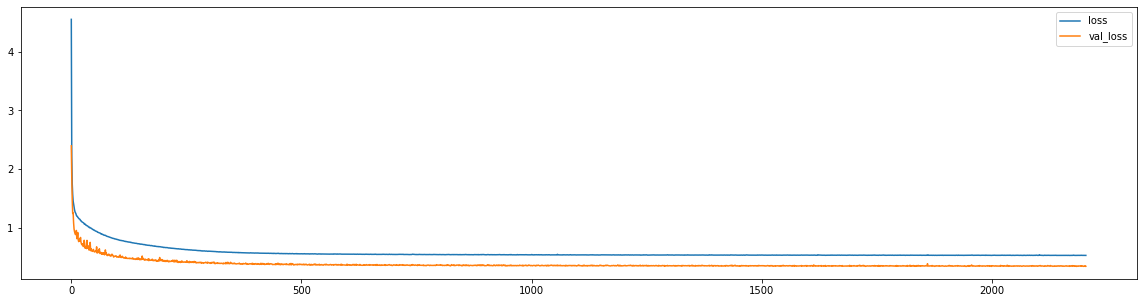

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

In [45]:
m.evaluate(features, target)

2358/2358 [==============================] - 13s 6ms/step - loss: 0.2998


0.2998189926147461

In [46]:
y_pred = m.predict(features, batch_size = 512)

148/148 [==============================] - 2s 14ms/step


In [47]:
target[0]

array([ 5.83749171,  5.90779385,  7.87625392, 11.74287192, 12.23498694,
       12.86770625, 14.69556203, 15.8906985 , 15.53918778, 15.75009421,
       17.29674141, 17.22643927, 16.17190709, 17.36704356, 18.07006501,
       17.15613712, 18.28097145, 18.77308647, 17.85915858, 19.1245972 ,
       19.33550363, 18.49187789, 18.56218003, 18.63248218, 18.84338861,
       19.05429505, 19.26520149, 19.33550363, 19.33550363, 19.47610792,
       19.54641007, 17.01553283,  9.56350541,  7.87625392,  8.64957752,
        7.59504534,  7.66534749,  8.2980668 ,  7.24353461,  7.94655607,
        7.59504534,  7.45444105,  8.1574625 ,  6.82172174,  7.17323247,
        7.5247432 ,  6.96232603,  7.45444105,  7.59504534,  7.17323247,
        7.73564963,  7.24353461,  7.59504534,  7.3841389 ,  7.24353461,
        7.73564963,  7.5247432 ,  6.96232603,  7.10293032,  7.31383676,
        6.11870029,  7.03262818,  6.82172174,  6.54051316,  6.96232603,
        6.82172174,  6.54051316,  6.82172174,  6.82172174,  6.39

In [48]:
y_pred[0]

array([ 6.0288267,  5.940836 ,  8.280849 , 11.596208 , 12.436042 ,
       12.929146 , 14.82291  , 15.969732 , 15.53269  , 15.846628 ,
       17.153782 , 17.116537 , 16.596882 , 17.357874 , 17.81165  ,
       17.480146 , 18.112274 , 18.644192 , 18.330782 , 18.63312  ,
       19.027527 , 18.769331 , 18.707731 , 18.935762 , 18.971323 ,
       19.1252   , 19.378233 , 19.49151  , 19.573603 , 19.758064 ,
       19.465729 , 16.830782 ,  9.545927 ,  8.186129 ,  8.346383 ,
        7.814744 ,  7.7659974,  7.8346486,  7.6451764,  7.615875 ,
        7.592716 ,  7.4316325,  7.3977137,  7.313817 ,  7.2055917,
        7.207789 ,  7.1964417,  7.1778293,  7.2719526,  7.274537 ,
        7.4169474,  7.394532 ,  7.2775235,  7.219284 ,  7.1568694,
        7.2468185,  7.1824446,  6.987832 ,  7.2324777,  7.0281315,
        6.8530645,  6.8665533,  6.8794994,  6.7759748,  6.7140236,
        6.7901998,  6.67908  ,  6.651979 ,  6.628709 ,  6.5616655,
        6.549738 ,  6.543699 ,  6.504568 ,  6.5002503,  6.4846

In [49]:
def draw_result(start, end, target, y_pred):
  plt.figure(figsize = (20, 7))
  plt.plot(np.reshape(target[start:end], -1), linewidth=5, label = "actual Pressure values")
  plt.plot(np.reshape(y_pred[start:end], -1), linewidth=2, label = "predict Pressure values")
  plt.legend()

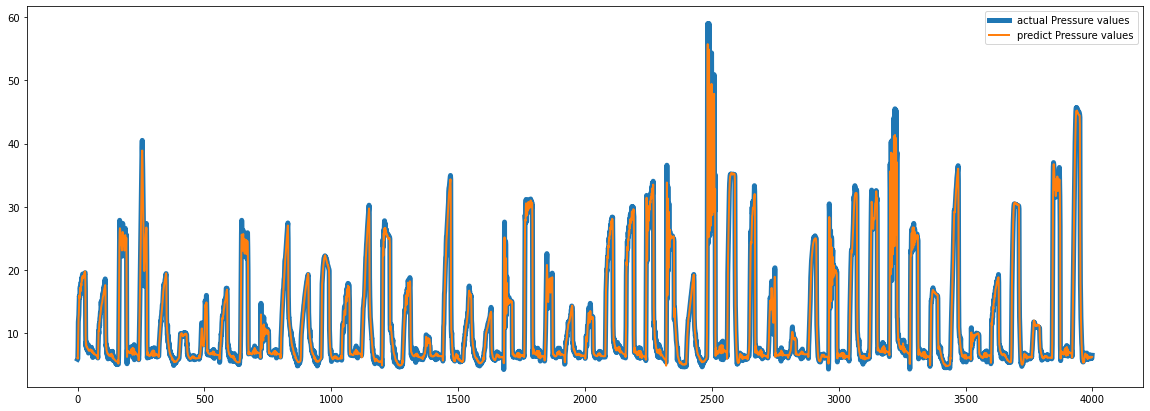

In [50]:
draw_result(0, 50, target, y_pred)

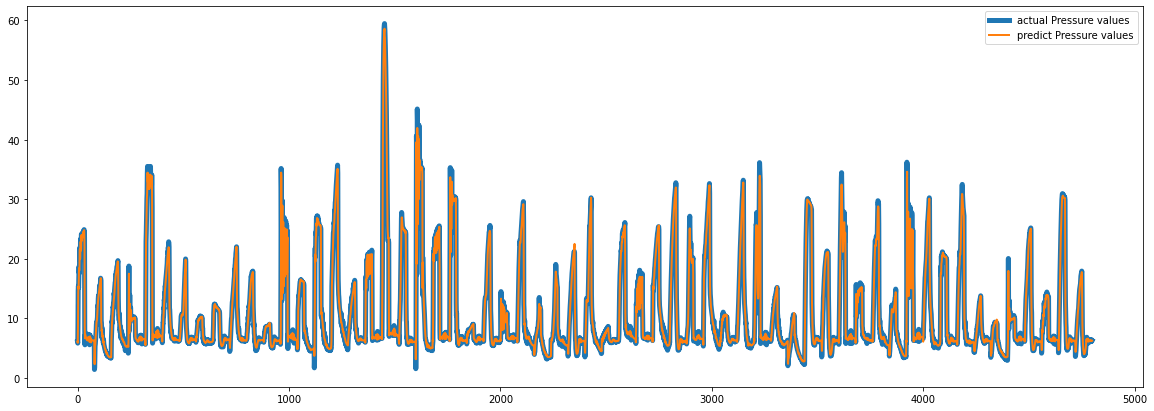

In [51]:
draw_result(50, 110, target, y_pred)

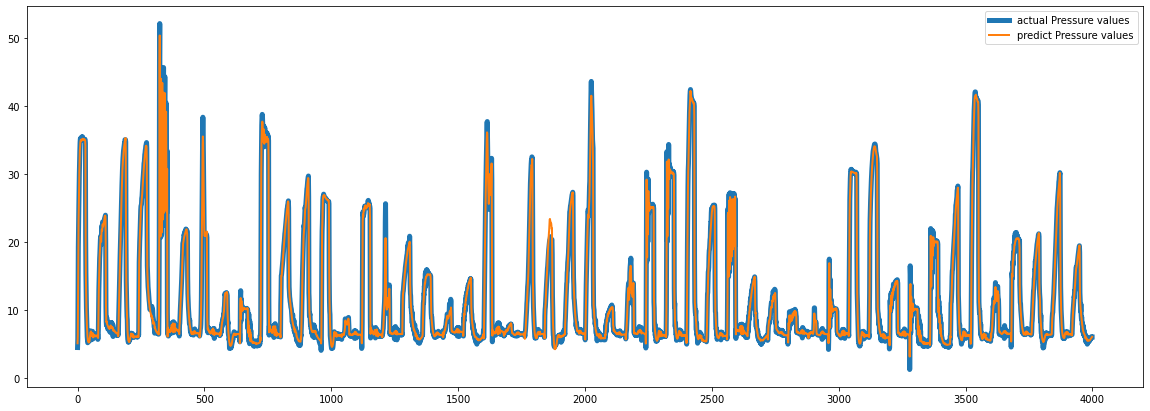

In [52]:
draw_result(110, 160, target, y_pred)

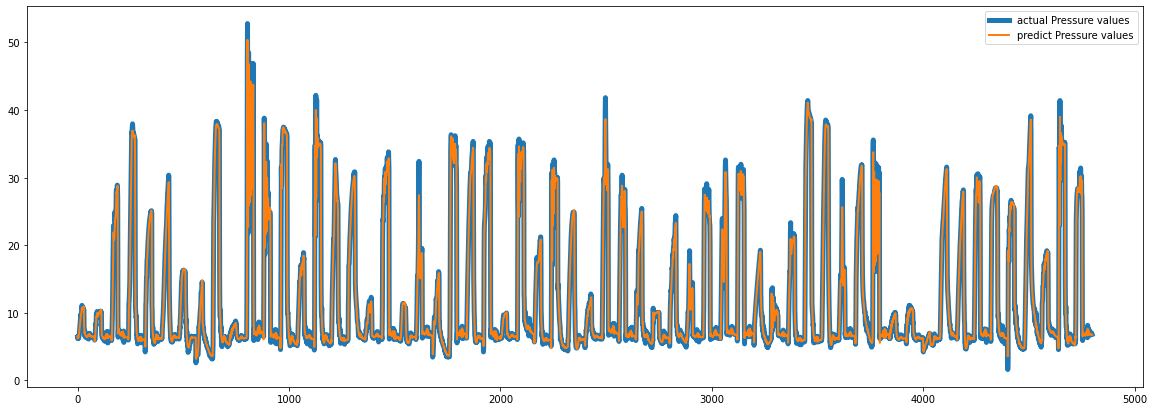

In [53]:
draw_result(160, 220, target, y_pred)

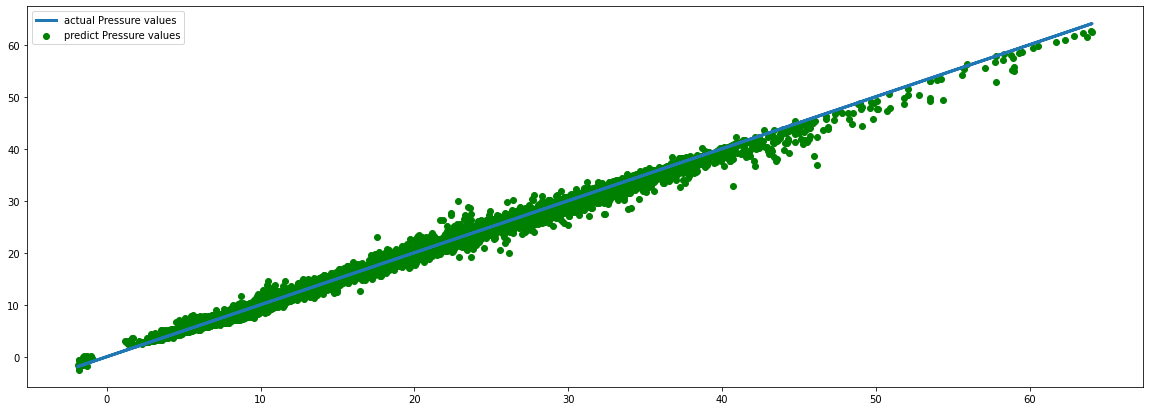

In [54]:
plt.figure(figsize = (20, 7))
plt.plot(np.reshape(target[:500], -1), np.reshape(target[:500], -1), linewidth=3, label = "actual Pressure values")
plt.scatter(np.reshape(target[:500], -1), np.reshape(y_pred[:500], -1), c = 'g', label = "predict Pressure values")
plt.legend()

In [55]:
def create_table(target, y_pred):
  target = np.reshape(target, -1)
  y_pred = np.reshape(y_pred, -1)
  return pd.DataFrame({
      "actual Pressure values": target,
      "predict Pressure values": y_pred,
      "diff": np.abs(target - y_pred)
  })

In [56]:
create_table(target, y_pred).head(40)

,actual Pressure values,predict Pressure values,diff
0,5.837492,6.028827,0.191335
1,5.907794,5.940836,0.033042
2,7.876254,8.280849,0.404596
3,11.742872,11.596208,0.146664
4,12.234987,12.436042,0.201055
5,12.867706,12.929146,0.061440
6,14.695562,14.822910,0.127348
7,15.890699,15.969732,0.079034
8,15.539188,15.532690,0.006498
9,15.750094,15.846628,0.096534


In [57]:
m.save("Ventilator_Pressure_Prediction.h5")